In [35]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
eps = np.finfo(float).eps
from sklearn import linear_model
from numpy import mean
from numpy import cov
from numpy import mean
from numpy import std
from numpy.linalg import eig
import pandas as pd
import numpy.random as rd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.preprocessing import LabelEncoder

In [36]:
df = pd.read_csv("Train_data.csv")
lbl = LabelEncoder();
df['protocol_type'] = lbl.fit_transform(df['protocol_type'])

In [37]:
Y = df['xAttack']
df.drop(['xAttack','num_outbound_cmds'],axis=1, inplace=True)
X = df.iloc[:,0:40].values
xmean = np.mean(X, axis=0)
xstd = np.std(X,axis=0)
FX = []
for index in X:
    tmp = []
    for i in range(len(index)):
        tmp.append((index[i]-xmean[i])/xstd[i])
    FX.append(tmp)
X = np.array(FX)

In [38]:
meanvector = np.mean(X, axis=0)
m = X.shape[0]-1;
covariance = ((X - meanvector).T.dot((X - meanvector)))/m
# covariance

In [39]:
eigenvalue, eigenvector = np.linalg.eig(covariance)
eigen_val_vec = []
# eigenvalue = np.abs(eigenvalue)
for i in range(len(eigenvector)):
    t = (eigenvalue[i],eigenvector[:,i])
    eigen_val_vec.append(t)

# eigenvector
# eigenvalue
for i in range(40):
    print df.columns[i]," ",eigenvalue[i]

duration   7.700908616811362
protocol_type   5.028775118413458
service   2.823236887563211
flag   2.2626637035654356
src_bytes   1.9565178120896132
dst_bytes   1.8574942915846109
land   1.4233783473709747
wrong_fragment   1.3022550311341892
urgent   1.1846533326278532
hot   0.0005503562531140238
num_failed_logins   0.004087470647662975
logged_in   0.009006702943587594
num_compromised   0.016123181285944903
root_shell   0.021173227628712144
su_attempted   0.043603257089416814
num_root   0.03919598038621081
num_file_creations   0.0620517758077491
num_shells   0.06689213962081746
num_access_files   0.09655544555002661
is_host_login   0.1689127359471242
is_guest_login   0.1379826269447291
count   0.25993509075813315
srv_count   0.3146079056144462
serror_rate   0.3493677558385457
srv_serror_rate   0.40882696469004504
rerror_rate   0.43556629829697074
srv_rerror_rate   0.45631563964111815
same_srv_rate   0.6005807628444141
diff_srv_rate   0.6124309023640805
srv_diff_host_rate   0.67333832679

In [40]:
eigen_val_vec.sort()
eigen_val_vec.reverse()

In [43]:
tot = sum(eigenvalue)
var_exp = [(i / tot)*100 for i in sorted(eigenvalue, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

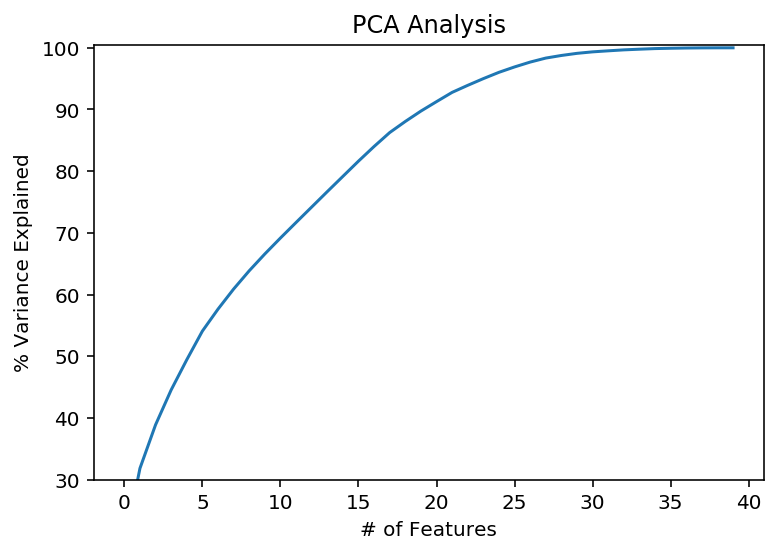

In [44]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(cum_var_exp)

##Can we apply PCA for the above dataset or not?

*PCA is desinged for continuous variables. It tries to minimize variance (=squared deviations). The concept of squared deviations breaks down when you have binary variables.
So yes, you can use PCA. And yes, you get an output. It even is a least-squared output - it's not as if PCA would segfault on such data. It works, but it is just much less meaningful than you'd want it to be.

*In the dataset shared, more than half features are categorical (i.e 23 features are categorical).Since they are categorical they have very small variance( and hence if we apply PCA on them then most of the categorical features will not be considered over continuous fetaure.We can use non linear PCA when the handling of categorical data is required.In non-linear PCA you first make categorical variables into continuous variables and then do the same as PCA. 